<a href="https://colab.research.google.com/github/Carol-Kelly/some-works/blob/main/Movie_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Domain Sentiment Dataset (version 2.0)**

This sentiment dataset supersedes the previous data.

Data Source: https://www.cs.jhu.edu/~mdredze/datasets/sentiment/

Reference: Domain Adaptation for Sentiment Classification. Association of Computational Linguistics (ACL), 2007

### Problem Statement
The Multi-Domain Sentiment Dataset contains product reviews taken from Amazon.com from many product types (domains). Some domains (books and dvds) have hundreds of thousands of reviews. Others (musical instruments) have only a few hundred. Reviews contain star ratings (1 to 5 stars) that can be converted into binary labels if needed.
This project aims to solve ...

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().any()

True

In [7]:
df.duplicated().sum()

418

In [8]:
#check the number of unique_values
unique_val=df.shape[0] - df.duplicated().sum()
unique_val

49582

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
#confirm new shape is same as unique values
print(f'New dimension of df: {df.shape}')

New dimension of df: (49582, 2)


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
# check for unique values in target variable
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

####**Exploratory Data Analysis**

In [14]:
from collections import Counter
c=Counter(df.sentiment)
c

Counter({'positive': 24884, 'negative': 24698})

In [15]:
# percentage of positive sentiments
pos_sent = round((c.get('positive')/len(df))*100)
print(f'Percentage of positive reviews:', pos_sent,'%')

Percentage of positive reviews: 50 %


So there are approximately equal positive and negative sentiments

In [16]:
df.describe(include='all')

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

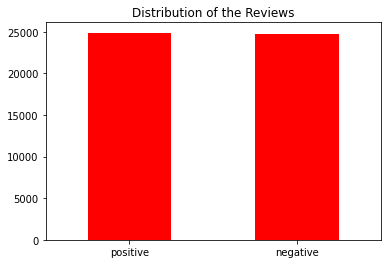

In [18]:
df['sentiment'].value_counts().plot(kind='bar', color='red', title='Distribution of the Reviews')
plt.xticks(rotation=360)
plt.show()

In [ ]:
df_copy = df.copy()
df_copy.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


####**Text Processing**

In [19]:
import re
import nltk
#nltk.download('stopwords')
nltk.download('wordnet')
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 38.0 MB/s 
     |████████████████████████████████| 287 kB 62.9 MB/s 


In [21]:
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 32.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=a739965c0347ca2bd2bf0104c7993123356fd5fe48f393a6a7cb78e30b57fe2e
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [22]:
import emoji as emj

# remove emojis from the review column and add it to a new column if present
EMOJIS = emj.UNICODE_EMOJI["en"]

def extract_emoji(df):
  df["emoji"] = ""
  for index, row in df.iterrows():
    for emoji in EMOJIS:
      if emoji in row["review"]:
        row["review"] = row["review"].replace(emoji, "")
        row["emoji"] += emoji

extract_emoji(df)
#print(df.to_string())

In [23]:
from gc import collect
from IPython.display import clear_output
#import nltk
dler = nltk.downloader.Downloader()
dler._update_index()
nltk.download('omw-1.4')

clear_output()
for i in range(3): collect(i)

In [24]:
#from nltk.stem.porter import PorterStemmer ##stemming purpose
#ps = PorterStemmer()
wnl = WordNetLemmatizer()
corpus = []
for i in range(len(df['review'])):
  review = re.sub('<.*?>', '', df['review'][i])
  review = re.sub(r'[^\w\s]', '', review)
  review = re.sub(r'https://\S+|www\.\S+', '', review)
  review = review.lower()
  review = review.split()
  # using contractions.fix to expand the shortened words
  review = [contractions.fix(word) for word in review]
  #corpus.append(review)

  review = [wnl.lemmatize(w) for w in review]#for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [25]:
corpus

['one of the other reviewer ha mentioned that after watching just 1 oz episode you will be hooked they are right a this is exactly what happened with methe first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the wordit is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda them city is home to manyaryans muslim gangsta latino christian italian irish and moreso scuffle death stare dodgy dealing and shady agreement are never far awayi would say the main appeal of the show is due to the fact that it go where other show would not dare forget pretty picture painted for mainstr

In [26]:
corpus[2]

'i thought this wa a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the character are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it wa proof that woody allen is still fully in control of the style many of u have grown to lovethis wa the most id laughed at one of woodys comedy in year dare i say a decade while i have never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it wa wittier than devil wear prada and more interesting than superman a great comedy to go see with friend'

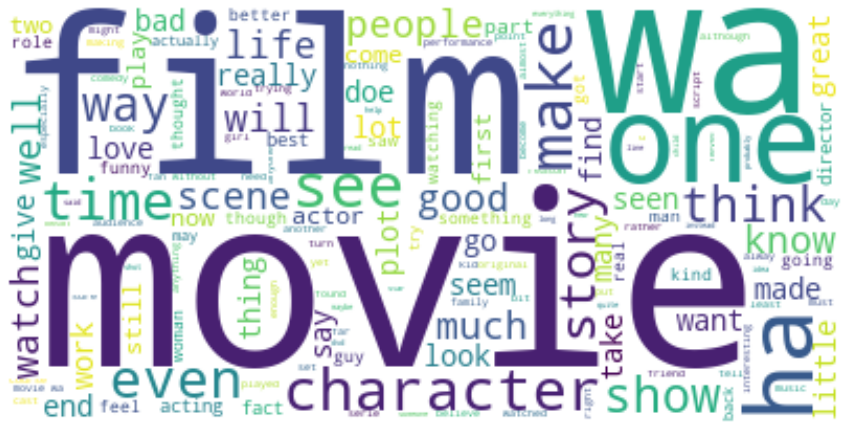

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=150, random_state=42, background_color='white', collocations=True).generate(str(corpus))#(str(train['review'])))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
df['sentiment'].loc[df['sentiment']=='positive']=1.0
df['sentiment'].loc[df['sentiment']=='negative']=0.0

Creating this split for the next (transformer) model before further modelling is used on it.

In [29]:
X = df['review']
y = df['sentiment']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
#creating train and test sets for transformer-based model
df_train = pd.concat([X_train, y_train])
df_testing = pd.concat([X_test, y_test])
df_train.to_csv('train.csv', index=False)
df_testing.to_csv('test.csv', index=False)

In [32]:
# Defining the vocabulary size
vocabulary_size=5000

In [33]:
# creating a one-hot representation of words
from keras.preprocessing.text import one_hot
oneHot=[one_hot(words, vocabulary_size) for words in corpus]
#print(oneHot)

In [34]:
oneHot[1]

[1272,
 4371,
 3712,
 4025,
 1483,
 2288,
 4801,
 4729,
 4786,
 2348,
 4786,
 2680,
 1426,
 422,
 3014,
 1272,
 726,
 422,
 1756,
 3097,
 2029,
 36,
 2321,
 1226,
 1483,
 4055,
 3056,
 1483,
 1865,
 3957,
 761,
 1659,
 357,
 2516,
 4229,
 4653,
 1890,
 4101,
 1896,
 2217,
 1483,
 2223,
 2258,
 3937,
 4101,
 2217,
 1483,
 192,
 750,
 3265,
 1566,
 3654,
 1882,
 2562,
 4201,
 1483,
 3697,
 450,
 3697,
 3651,
 1483,
 894,
 1226,
 888,
 3635,
 1905,
 4653,
 1890,
 4729,
 4257,
 1659,
 3865,
 1483,
 3751,
 2258,
 4257,
 4729,
 1272,
 733,
 4034,
 422,
 3369,
 3056,
 1272,
 4963,
 4025,
 4794,
 311,
 36,
 1483,
 3218,
 2270,
 36,
 3341,
 422,
 4044,
 4312,
 1483,
 2321,
 2755,
 4978,
 4266,
 1476,
 1483,
 3712,
 3864,
 1483,
 1458,
 36,
 1483,
 2721,
 4935,
 4085,
 2211,
 1609,
 1483,
 1681,
 1548,
 4801,
 3416,
 2916,
 4633,
 346,
 4257,
 2128,
 4799,
 3370,
 1696,
 422,
 3370,
 1304,
 3147,
 1476,
 1483,
 1979,
 1056,
 2331,
 422,
 2246,
 422,
 1483,
 3542,
 3147,
 36,
 2096,
 4703,
 1476,

####**Model Building**

In [35]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [40]:
# Determining the maximum sentence length
sent_len = [len(sentence.split()) for sentence in corpus]
print(max(sent_len))

2461


In [43]:
# post padding
embed_docs=pad_sequences(oneHot, padding='post', maxlen=2461)
#print(embed_docs)

In [44]:
embed_docs[0]

array([ 311,   36, 1483, ...,    0,    0,    0], dtype=int32)

**Word Embedding and LSTM RNN**

In [ ]:
#!pip install tensorflow-gpu

In [46]:
## Creating model
feature_vector=20 ##features representation
model=Sequential()
model.add(Embedding(vocabulary_size, feature_vector, input_length=2461))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2461, 20)          100000    
                                                                 
 dropout_3 (Dropout)         (None, 2461, 20)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 2461, 2048)       8560640   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              4720640   
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [47]:
X_array = np.asarray(embed_docs)
y = df['sentiment'].values
y_array = np.asarray(y).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)

Epoch 1/20
 735/2480 [=======>......................] - ETA: 1:01:59 - loss: 0.6972 - accuracy: 0.5037

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.where(y_pred>0.5, 1, 0)

**Model Evaluation for LSTM RNN**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
print(classification_report(y_test, y_pred))
print('Accuracy of LSTM RNN:', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

**Transformer-based model - DistilBERT**

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 13.8 MB/s 
     |████████████████████████████████| 132 kB 74.5 MB/s 
     |████████████████████████████████| 212 kB 81.3 MB/s 
     |████████████████████████████████| 127 kB 71.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import datasets
from datasets import load_dataset
dataset = load_dataset('csv', data_files={'train': 'train.csv', 'test': 'test.csv'})
#dataset = load_dataset('csv', data_files='my_data.csv', sep=';')
#from datasets import Dataset, DatasetDict

#Convert a Pandas DataFrame to Hugging Face Dataset
#df2 = Dataset.from_pandas(df_copy)
#dataset = DatasetDict()
#dataset = df2
dataset

Dataset({
    features: ['Sentiment', 'label'],
    num_rows: 49582
})

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 12.7 MB/s 
     |████████████████████████████████| 7.6 MB 54.2 MB/s 
     |████████████████████████████████| 182 kB 60.3 MB/s 


In [ ]:
from transformers import AutoTokenizer
#load the model
model_name = 'distilbert-base-uncased'

#build a tokenizer from the loaded model
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#for inspecting the vocabulary size
print('tokenizer vocab size:', tokenizer.vocab_size)

#model maximum context size
print('Max length of model:', tokenizer.model_max_length)

#features name - the names of the fields that the model expects in its forward pass
print('Feature name:', tokenizer.model_input_names)

tokenizer vocab size: 30522
Max length of model: 512
Feature name: ['input_ids', 'attention_mask']


In [ ]:
import torch
from transformers import AutoModel
model_name = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_name, num_labels=2).to(device)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def tokenize(batch):
  return tokenizer(batch['Sentiment'], padding='max_length', truncation=True)

In [ ]:
print(tokenize(dataset['train'][:2]))

![Imgur](https://imgur.com/f7CHg4R.png)
![Imgur](https://imgur.com/3RY8Gfl.png)

In [ ]:
# this will add the 'input_ids' and 'attention_mask' columns to the dataframe
pretrained_encoded_features = dataset.map(tokenize, batched=True, batch_size=None)
print('New feature names of dataset:', pretrained_encoded_features['train'].column_names)

  0%|          | 0/1 [00:00<?, ?ba/s]

ValueError: ignored

In [ ]:
def get_hidden_state(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

  #we don't need all the gradients on pytorch tensor, so use torch.no_grad(). it's a context manager
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state

  return {'hidden_state': last_hidden_state[:,0].cpu().numpy()}#cpu().numpy() gets the scalar values from the pytorch tensor

# convert the input ids and attention mask into the torch format
pretrained_encoded_features.set_format('torch', columns=['input_ids', 'attention_mask', 'Sentiment'])#in the video, sentiment was 'label'

pretrained_hidden_states = pretrained_encoded_features.map(get_hidden_state, batched=True)#use the default batch_size=1000
pretrained_hidden_states['train'].column_names

In [ ]:
pretrained_hidden_states

In [ ]:
#here, use the pretrained words from distilbert to form the train and test sets
X_train = np.array(pretrained_hidden_states['train']["hidden_state"])
X_valid = np.array(pretrained_hidden_states['test']["hidden_state"])

y_train = np.array(pretrained_hidden_states['train']["Sentiment"])
y_valid = np.array(pretrained_hidden_states['test']["Sentiment"])
print(f'Xtrain_shape : {X_train.shape}, X_valid_shape: {X_valid.shape}')

In [ ]:
#train a classifier with this hidden states of DistilBERT
from sklearn.linear_model import LogisticRegression
# Max iteration (3000)max_iter = 3000
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
print('Logistic Regression_Score', lr_clf.score(X_valid, y_valid))

**Fine-tune DistilBERT**

In [ ]:
from transformers import AutoModelForSequenceClassification
num_labels = len(dataset['train'].features['label'].names)
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels).to(device))

#define the metric computation function
def compute_metric(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='macro')
  acc = accuracy_score(labels, preds)
  return {'accuracy': acc, 'f1_score': f1}

The Hugging face model presents its predictions as a tuple containing the predictions, label_ids and the metric; which is what was used above to write the compute_metric function.

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 12#remember to change this

logging_steps = len('train') // batch_size

modelArtifact_name = f"{model_name}-finetuneDistilBERT-movie"
#specifying train paramters
training_args = TrainingArguments(output_dir = modelArtifact_name,
                                  num_train_epochs=20,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error"
                                  )

In [ ]:
# actual training for fine-tuning
trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metric,
                  train_dataset = pretrained_encoded_features['train'],
                  eval_dataset = pretrained_encoded_features['test'],
                  tokenizer = tokenizer
                  )
trainer.train()

In [ ]:
predicted_output = trainer.predict(pretrained_encoded_features['test'])

In [ ]:
predicted_output.metrics

**Error Analysis - Detect wrong labels by juxtaposing actual and predicted**

In [ ]:
#logits are normalized final score of your model and are inputs to softmax function
from torch.nn.functional import cross_entropy

def retrieve_loss_and_label(batch):
    inputs = {k: v.to(device) for k, v in batch.items()
                if k in tokenizer.model_input_names }

    with torch.no_grad():
        output = model(**inputs)
        pred_sentiment = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['Sentiment'].to(device), reduction='none' )

    return {'loss ': loss.cpu().numpy(),
            'predicted_label ': pred_sentiment.cpu().numpy() }

In [ ]:
#convert the dataset back to pytorch tensor
pretrained_encoded_features.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

# Compute loss values
pretrained_encoded_features['test'] = pretrained_encoded_features['test'].map(
    retrieve_loss_and_label, batched=True, batch_size=16)

In [ ]:
#represent output in a dataset format- int2str is hugging face built-in method
def sentiment_int2str(row):
    return dataset['train'].features['label'].int2str(row)

#convert back from torch to pandas
pretrained_encoded_features.set_format('pandas')

cols = ['Sentiment', 'label', 'predicted_label', 'loss']

df_test = pretrained_encoded_features['test'][:][cols]

df_test["Sentiment"] = df_test["Sentiment"].apply(sentiment_int2str)

df_test["predicted_sentiment"] = (df_test["predicted_sentiment"]
                              .apply(sentiment_int2str))

# see the top most errorneous predictions
df_test.sort_values('loss', ascending=False ).head(10)

In [ ]:
#then the best predictions
df_test.sort_values('loss', ascending=True ).head(10)